- Требуется:
    - Провести анализ выборки:
        - Определить тип признаков.
        - Выполнить визуальный анализ данных.
    - Выполнить препроцесинг данных:
        - Преобразовать категориальные признаки в вещественные.
        - Отнормировать признаки.
    - Провести эксперимент для предложеных методов:
        - Выполнить подбор гиперпараметров.
        - Подобрать регуляризаторы.
        - Получить итоговые модели.
    - Описать полученые результаты:
        - Какая модель лучше и почему.
        - С какими проблемами столкнулись во время выполнения, возможно недочеты стандартных библиотек.
        - Совпадают ли полученные результаты с ожидаемыми результатами.

Признаки (по порядку):
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]
print("Размер выборки составляет ", len(data))

Размер выборки составляет  506


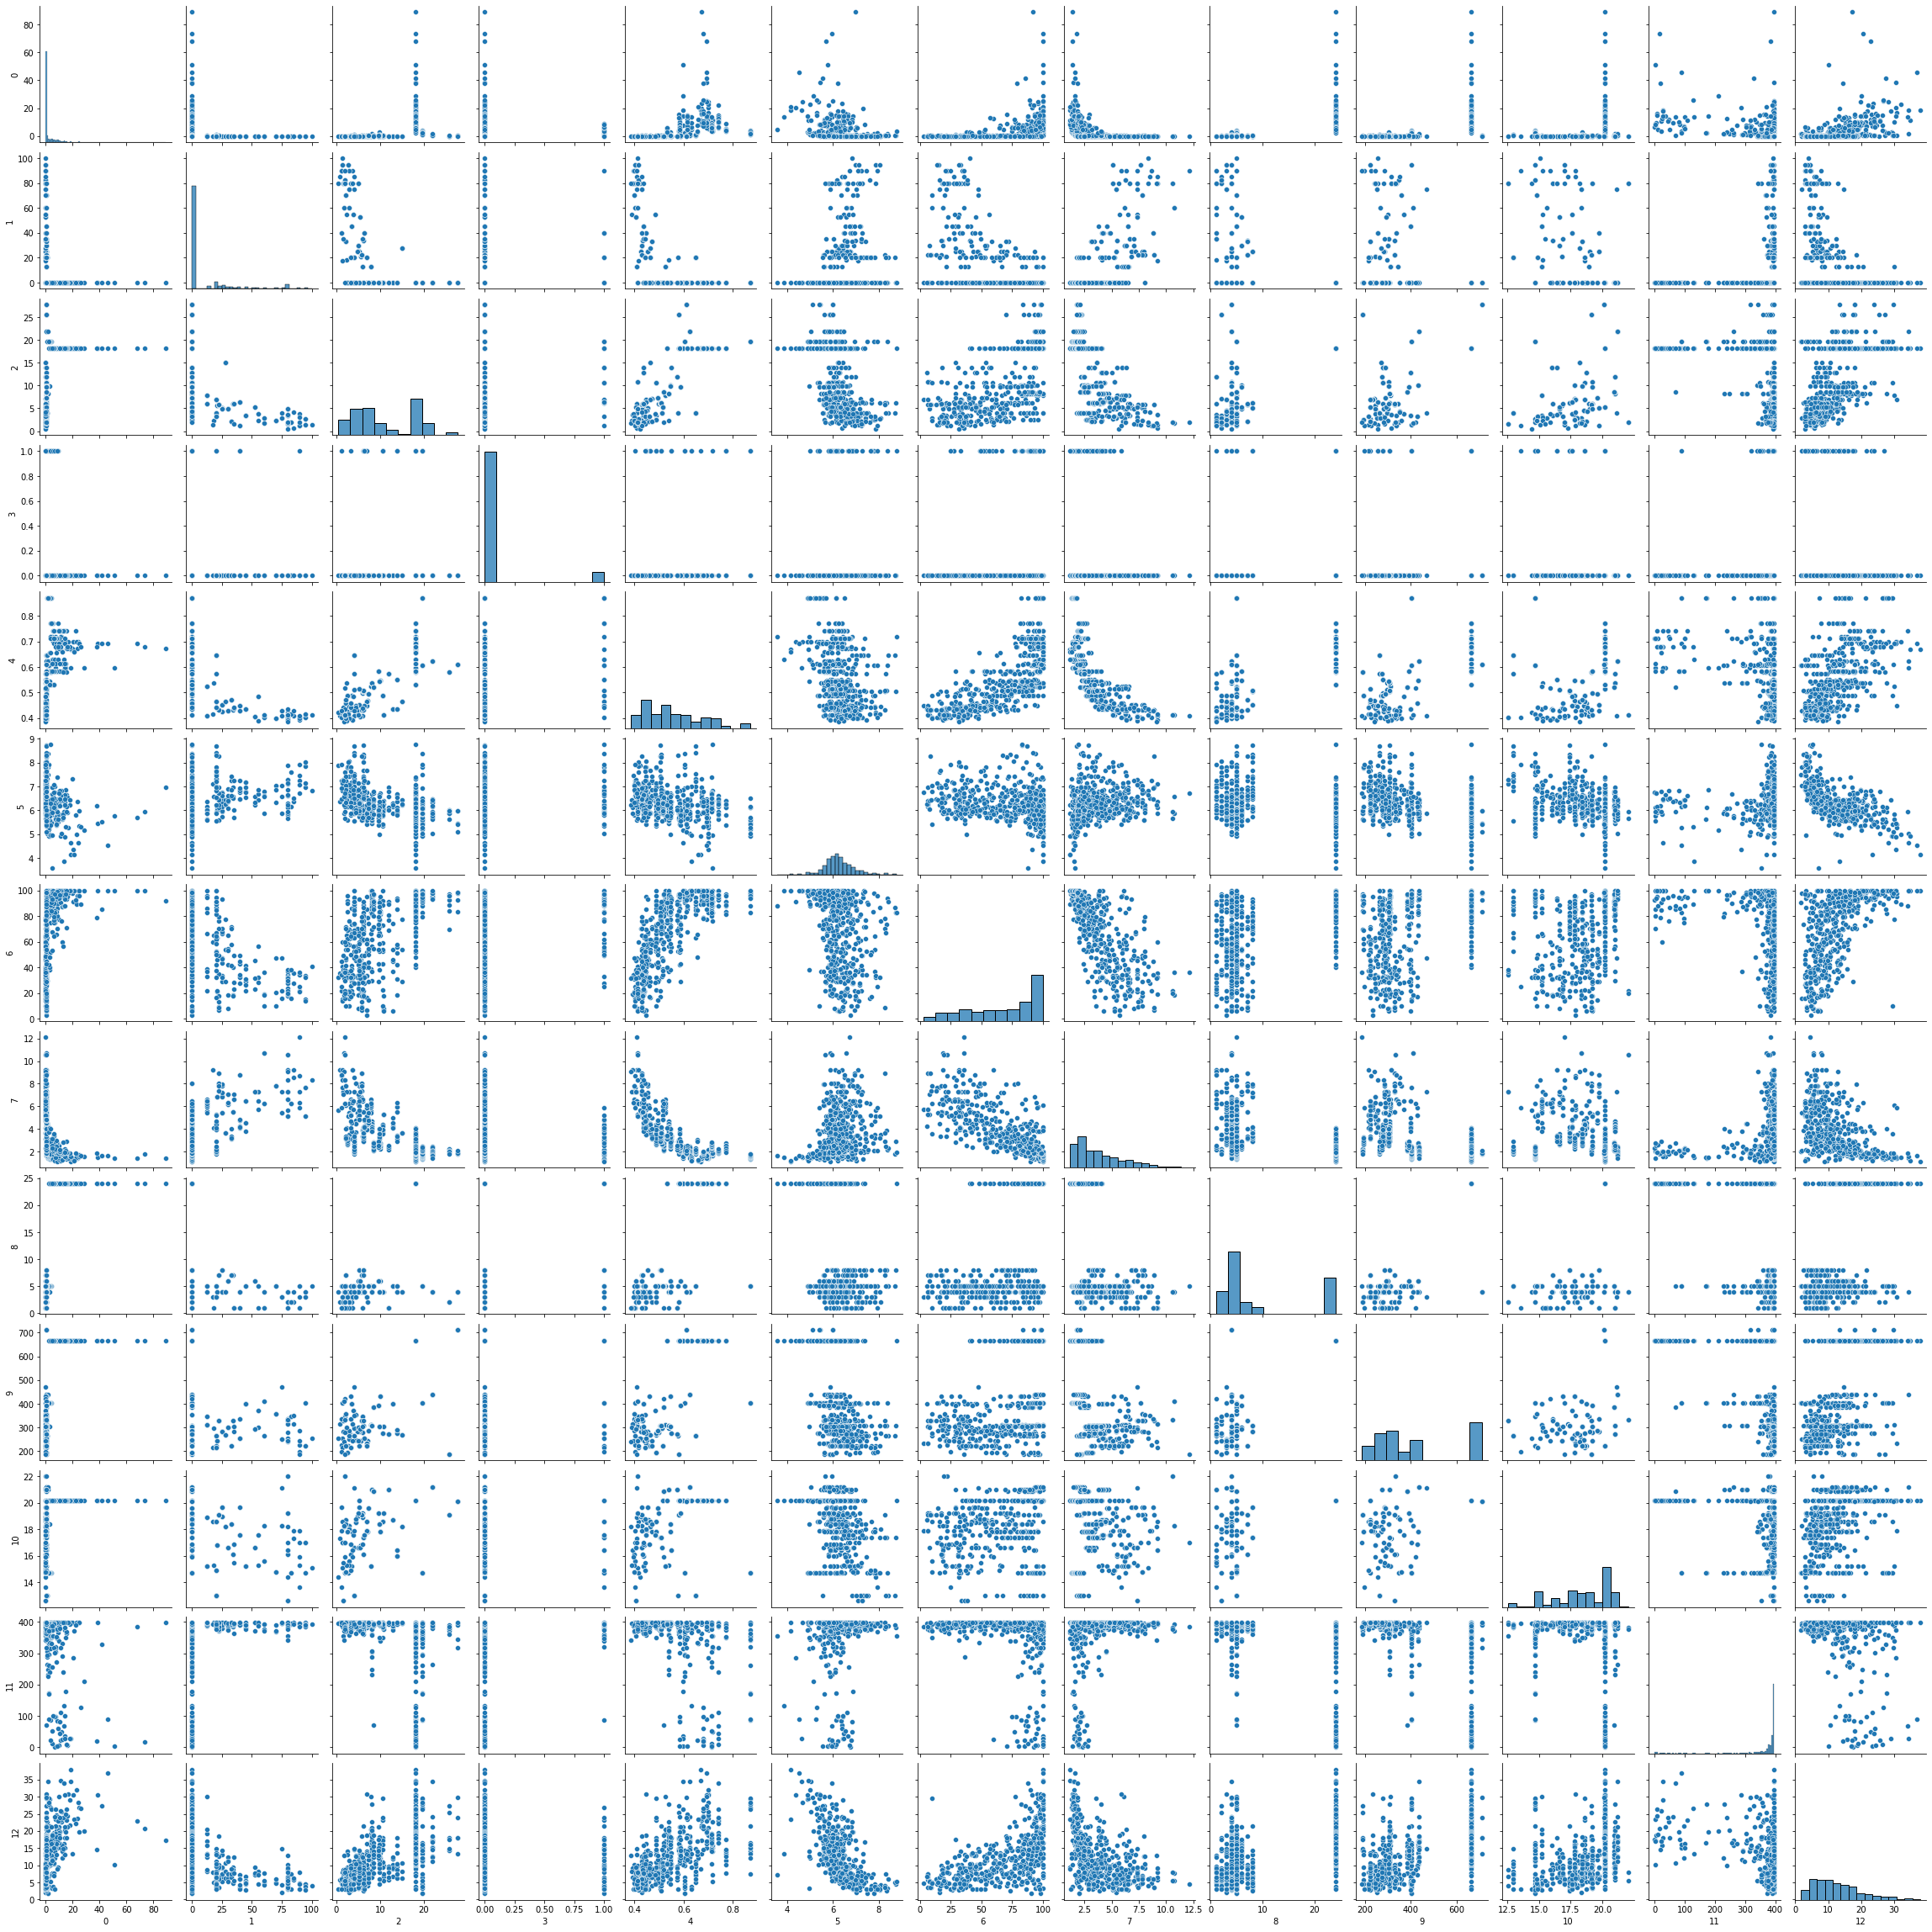

In [24]:
sns.pairplot(pd.DataFrame(data))

In [4]:
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
sns.set(rc={"figure.figsize":(10, 8)})

<AxesSubplot:>

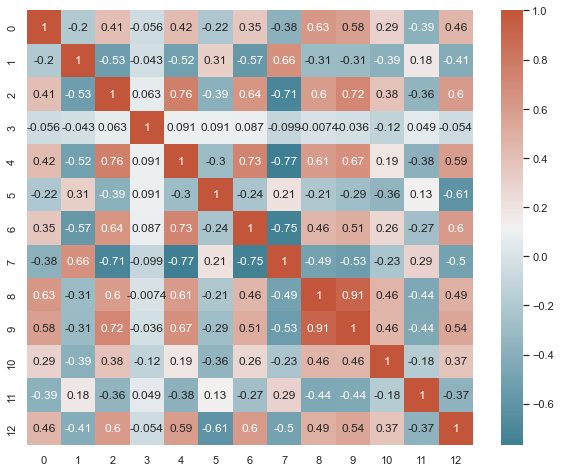

In [35]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

TODO: построить гистограммы распределения признаков

<AxesSubplot:ylabel='Frequency'>

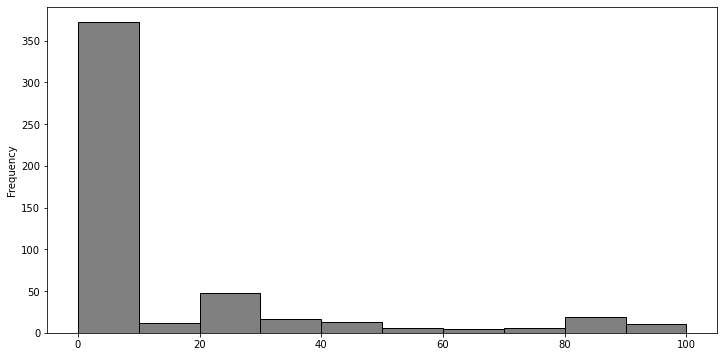

In [7]:
data[1].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')